In [23]:
import itertools

import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [24]:
df1 = pd.read_csv("../data/heartbeat/ptbdb_normal.csv", header=None)
df2 = pd.read_csv("../data/heartbeat/ptbdb_abnormal.csv", header=None)

df = pd.concat([df1, df2])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1337, stratify=df[187])


In [25]:
print(df_train.head(10))
print(df_train.describe())

           0         1         2         3         4         5         6    \
1024  1.000000  0.730599  0.472859  0.139526  0.000000  0.020507  0.112183   
336   1.000000  0.152446  0.011377  0.308305  0.153584  0.096701  0.083049   
2412  0.975917  0.693234  0.241399  0.107225  0.098050  0.072248  0.062500   
2098  0.952505  0.587508  0.115810  0.072869  0.003904  0.025374  0.020169   
1790  0.994152  0.525666  0.248213  0.070825  0.152047  0.258609  0.315789   
2316  0.951754  0.367794  0.248747  0.268797  0.141604  0.045113  0.063910   
3327  0.989673  0.777539  0.401033  0.186317  0.019363  0.013339  0.088640   
2740  0.979370  0.539255  0.030372  0.036390  0.053295  0.039542  0.031232   
4403  1.000000  0.746898  0.142266  0.175352  0.058726  0.167080  0.182796   
926   1.000000  0.549761  0.138635  0.000000  0.093438  0.197306  0.243372   

           7         8         9    ...  178  179  180  181  182  183  184  \
1024  0.162847  0.180941  0.192199  ...  0.0  0.0  0.0  0.0  0.

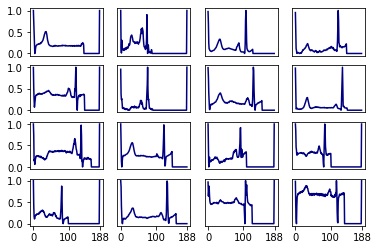

In [26]:
fig, axes = plt.subplots(nrows=4, ncols=4)

for i, ax in enumerate(fig.axes):
    df_train.iloc[i,:].plot(ax=ax, color='navy')
    ax.set_xticks([])
    ax.set_yticks([])
for i in [0, 4, 8, 12]:
    fig.axes[i].set_yticks([0, 0.5, 1])
for i in [12, 13, 14, 15]:
    fig.axes[i].set_xticks([0, 100, 188])    
plt.show()

In [27]:
X = df_train

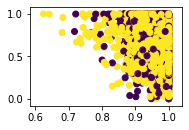

In [30]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X=X)
plt.subplot(221)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_pred)

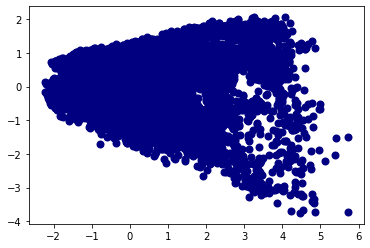

In [33]:
n_components = 5
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
X_ipca = ipca.fit_transform(X)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

colors = ['navy', 'turquoise', 'darkorange']

plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, color='navy')
plt.show()

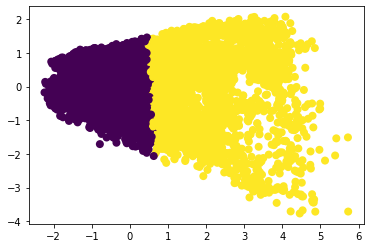

In [34]:
km = KMeans(n_clusters=2)
y_pred = km.fit_predict(X=X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred)

In [60]:
optics = OPTICS(min_samples=100).fit(X_ipca)
y_pred = optics.fit_predict(X=X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred)

KeyboardInterrupt: 

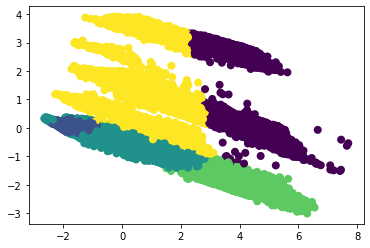

In [58]:
gmm = GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=100).fit(X_ipca)
y_pred = gmm.predict(X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred)